# Práctica 6. Histograma de frecuencia de intensidades

<div class="alert alert-block alert-success">
<b>Resumen:</b> Esta práctica explora la creación y análisis de histogramas de imágenes utilizando Python, OpenCV y Numpy. Inicia con el calculo de histogramas para imágenes en escala de grises, donde se visualizan las intensidades de los píxeles. Luego,se  aborda el calculo de histogramas para imágenes RGB, destacando cómo se pueden analizar los diferentes canales de color por separado. Además, se muestra cómo ajustar el número de contenedores (bins) para personalizar el histograma.
</div>

***

Lista de instrucciones utilizadas:
 
1. Lectura y visualización de imágenes:
   - `cv2.imread()`: Lectura de imágenes en diferentes formatos y escalas.
   - `plt.imshow()`: Visualización de imágenes utilizando Matplotlib.
   - `plt.figure()`: Configuración del tamaño y propiedades de las figuras.
   - `plt.subplot()`: Creación de subplots para mostrar múltiples imágenes o gráficos en una sola figura.
2. Generación de histogramas:
   - `cv2.calcHist()`: Cálculo del histograma de una imagen utilizando OpenCV.
   - `plt.hist()`: Cálculo de histogramas utilizando Matplotlib para mostrar la distribución de intensidades de píxeles.
   - `np.histogram()`: Cálculo del histograma de una imagen utilizando Numpy, que devuelve los conteos de los contenedores y los bordes de los contenedores.
   - `plt.stem()`: Visualización de datos discretos en gráficos deao.
3. Manipulacne arrays:
   - `im_gray.ravel()`: Aplanamiento de una matriz 2D en un array 1D.
   - `bin_edges[:-1]`: Selección de todos los elementos de un array excepto el último, comúnmente utilizado para eliminar el borde extra generado por `np.histogram()`.
4. Segmentación de imágenes:
   - Operaciones lógicas (`<`, `>`, `&`): Utilizadas para crear máscaras binarias que segmentan regiones específicas de la imagen en función de valores intensidad.
5. Conversión espacios de color:
   - `cv2.cvtColor()`: Conversión de la imagen RGB de OpenCV de formato BGR a RGB para visualización adrísticas visuales clave.


Temas relacionados:

- Análisis e interpretación de histogramas en imágenes.
- Visualización histogramas datos.
- Segmentación de objetos y fondos.

***
## 1. Calculo del histograma 

### 1.1. Calculo del histograma con opencv

La función `cv.calcHist()` calcula el histograma de una imagen (arreglo). Sus parámetros son:

`cv.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])`

- `images`: es la imagen fuente, de tipo `uint8` o `float32`. Debe proporcionarse entre corchetes, es decir, `[img]`.
- `channels`: también entre corchetes. Es el índice del canal para el cual calculamos el histograma. Por ejemplo, si la imagen de entrada es en escala de grises, su valor es `[0]`. Para una imagen en color, puedes pasar `[0]`, `[1]` o `[2]` para calcular el histograma del canal azul (blue), verde (green) o rojo (red), respectivamente.
- `mask`: imagen de máscara. Para encontrar el histograma de toda la imagen, se proporciona como `None`. Pero si deseas encontrar el histograma de una región particular de la imagen, debes crear una imagen de máscara para esa región y pasarla como máscara.
- `histSize`: esto representa el número de contenedores (BIN). Debe proporcionarse entre corchetes. Para la escala completa, `[256]`. 
- `ranges`: este RANGO es normalmente `[0,256]`.

***
### 1.2. Calculo del histograma con Numpy

Numpy también ofrece la función, `np.histogram()`. Así que, en lugar de la función `calcHist()` se puede utilizar la siguiente línea:

`hist, bins = np.histogram(img.ravel(), 256, [0, 256])`

similar a la función anterior. Pero `bins` tendrá 257 elementos, porque Numpy calcula los contenedores (bins) como 0-0.99, 1-1.99, 2-2.99, etc. Así que el rango final sería 255-255.99. Para representarlo en memoria, añade 256 al final de `bins`. Pero no necesitamos ese 256. Hasta 255 es suficiente.

***

### 1.3 Calculo del histograma con Matplotlib

La libreria Matplotlib incluye la función `matplotlib.pyplot.hist()` que directamente calcula el histograma y lo gráfica.
***

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

***
## 2. Histograma de imágenes en escala de grises
Lectura y visualización de la imagen:

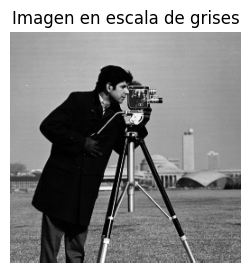

In [4]:
# Lectura de la imagen
im_gray = cv2.imread('./images/cameraman.tif', cv2.IMREAD_GRAYSCALE)

# Visualización de la imagen
plt.figure(figsize=(3,3))
plt.imshow(im_gray, cmap='gray')
plt.title('Imagen en escala de grises')
plt.axis('off')
plt.show()

### 2.1 Histograma de intensidades (opencv)

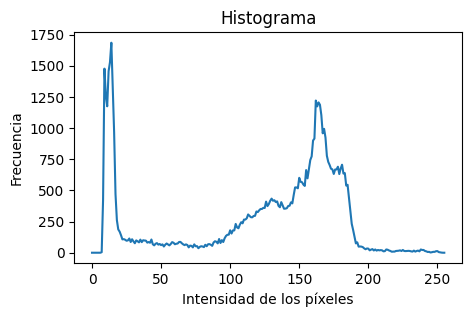

In [12]:
hist = cv2.calcHist([im_gray],[0],None,[256],[0,256])
# hist = cv2.calcHist([im_gray], [0])

# Visualización de la imagen
plt.figure(figsize=(5,3))
plt.plot(hist)
plt.title('Histograma')
plt.xlabel('Intensidad de los píxeles')
plt.ylabel('Frecuencia')
plt.show()

### 2.2. Histograma a partir de un número de contenedores (Numpy)

In [13]:
# Histograma con un número específico de contenedores (bins)
hist, bin_edges = np.histogram(im_gray, bins=50, range=(0, 256))

#hist,bin_edges = np.histogram(im_gray.ravel(),256,[0,256])

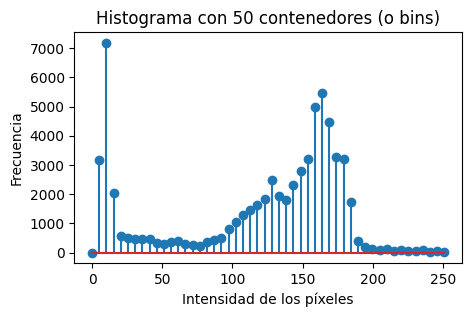

In [14]:
plt.figure(figsize=(5,3))
plt.stem(bin_edges[:-1], hist) # todos los elementos del array excepto el último.
plt.title('Histograma con 50 contenedores (o bins)')
plt.xlabel('Intensidad de los píxeles')
plt.ylabel('Frecuencia')
plt.show()

### 2.3. Histograma de intensidades (por Matplotlib)

La función `im_gray.ravel()` en Python convierte la matriz de la imagen im_gray en un arreglo unidimensional (una lista o vector) sin cambiar los datos subyacentes. Es decir, toma todos los píxeles de la imagen, que originalmente están organizados en una matriz bidimensional, y los "aplana" en un solo vector.

Esto es útil cuando se necesita realizar operaciones que requieren un arreglo unidimensional, como la creación de un histograma, donde cada valor de píxel se cuenta independientemente de su posición en la imagen original.

C:\Users\nicol\AppData\Local\Temp\ipykernel_21184\442617678.py:5: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.hist(im_gray.ravel(), 256, [0,256])


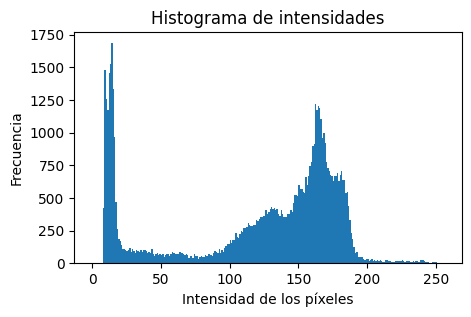

In [8]:
# crea la figura
plt.figure(figsize=(5,3))

# calcula el histograma de intensidades
plt.hist(im_gray.ravel(), 256, [0,256])

# propiedades de la figura
plt.title('Histograma de intensidades')
plt.xlabel('Intensidad de los píxeles')
plt.ylabel('Frecuencia')
plt.show()

## 3. Histograma de imágenes RGB

Lectura y visualización de la imagen:

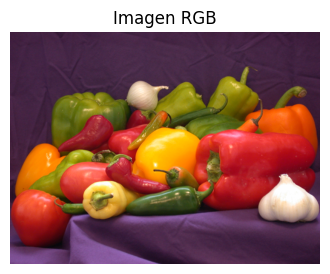

In [15]:
# Lectura de la imagen RGB
im_bgr = cv2.imread('./images/peppers.png')
im_rgb = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2RGB)

# Visualización de la imagen
plt.figure(figsize=(4,4))
plt.imshow(im_rgb)
plt.title('Imagen RGB')
plt.axis('off')
plt.show()

### 3.1. Histograma de intensidades (opencv)

El siguiente código parte de que la imagen es rgb.

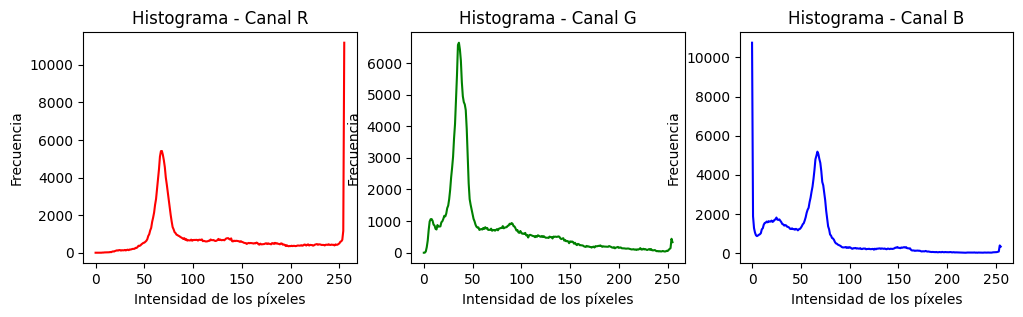

In [16]:
# Para calcular y mostrar el histograma de intensidades de cada canal
colors = ('r', 'g', 'b')
plt.figure(figsize=(12,3))

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    hist = cv2.calcHist([im_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.title(f'Histograma - Canal {color.upper()}')
    plt.xlabel('Intensidad de los píxeles')
    plt.ylabel('Frecuencia')

plt.show()

Calcula el histograma en cada canal (r, g, b), y luego los grafica en un único eje

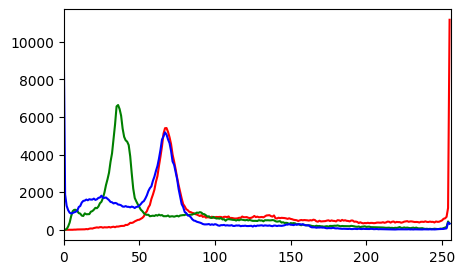

In [17]:
plt.figure(figsize=(5,3))

for i,col in enumerate(colors):
    histr = cv2.calcHist([im_rgb],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
    
plt.show()

### 3.2. Histograma a partir del número de contenedores (Numpy)

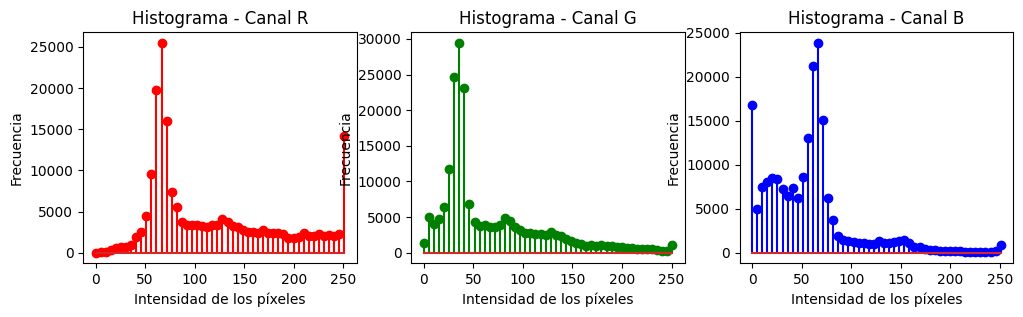

In [22]:
# Histograma con un número específico de contenedores para cada canal
plt.figure(figsize=(12,3))

for i, color in enumerate(colors):
    hist, bin_edges = np.histogram(im_rgb[:,:,i], bins=50, range=(0, 256))
    plt.subplot(1, 3, i+1)
    plt.stem(bin_edges[:-1], hist, linefmt=color, markerfmt=color+'o')
    plt.title(f'Histograma - Canal {color.upper()}')
    plt.xlabel('Intensidad de los píxeles')
    plt.ylabel('Frecuencia')

plt.show()

<div style="text-align: center; margin: 20px 0;">
  <hr style="border: none; height: 2px; background: linear-gradient(to right, #bbb, #333, #bbb); width: 50%; margin: 0 auto;" />
</div>